In [1]:
from os.path import abspath, join
from glob import glob
import sys
current = abspath("")
root_dir = abspath(join(current, '..', '..'))
root_data_dir = join(root_dir, "Data")
import sys
if not root_dir in sys.path: 
    sys.path.append(root_dir)

In [2]:
from utils import (style, get_params, mcmc, plot_chain, plot_corner, plot_fit, calculate_prob, get_data, Model)

style()

In [3]:
z_dir_path = join(root_data_dir, 'Effective-Volume-no')
w_dir_path = join(root_data_dir, 'Velocity-Distribution-no')
z_dir_path, w_dir_path

('/home2/s20321005/Thesis-Project/Data/Effective-Volume-no',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no')

In [4]:
index = 0
z_files = glob(join(z_dir_path, "z*"))
z_files.sort()
w_files = glob(join(w_dir_path, "w*"))
w_files.sort()
name = z_files[index].split("/")[-1].replace(".hdf5", "").replace("z_", "")

result = mcmc(
    model=Model.NO,
    z_path=z_files[index],
    w_path=w_files[index],
    step0=100,
    step=1000,
    burn=1000,
    it=3,
    thin=20,
    m=10
)

result.keys()

running...
mcmc... (-0.10)_(0.11)


mcmc:   0%|          | 0/3 [00:00<?, ?it/s]

0: first half mcmc done 2.15 s


mcmc:  33%|███▎      | 1/3 [00:04<00:08,  4.21s/it]

0: second half mcmc done 2.05 s


mcmc:  67%|██████▋   | 2/3 [00:08<00:04,  4.13s/it]

1: first half mcmc done 2.04 s
1: second half mcmc done 2.03 s
2: first half mcmc done 2.01 s


mcmc: 100%|██████████| 3/3 [00:12<00:00,  4.11s/it]

2: second half mcmc done 2.02 s


dict_keys(['indexes', 'labs', 'labels', 'chain'])

In [5]:
indexes, labs, labels, chain = result.values()
indexes, labs, labels, chain.shape

([range(0, 12), 24, 25, 26, 27, 28, 29, 30, 31, 32],
 array(['rhob', 'log_nu0', 'R', 'zsun', 'w0', 'log_sigmaw', 'q_sigmaw',
        'log_a', 'q_a', 'log_phi_b'], dtype='<U32'),
 array(['$\\rho_{b}$', '$\\log \\nu_0$', '$R$', '$z_{\\odot}$', '$w_0$',
        '$\\log \\sigma_{w}$', '$q_{w}$', '$\\log a$', '$q_a$',
        '$\\log \\Phi_b$'], dtype='<U32'),
 (50, 330, 33))

100%|██████████| 10/10 [00:01<00:00,  7.64it/s]


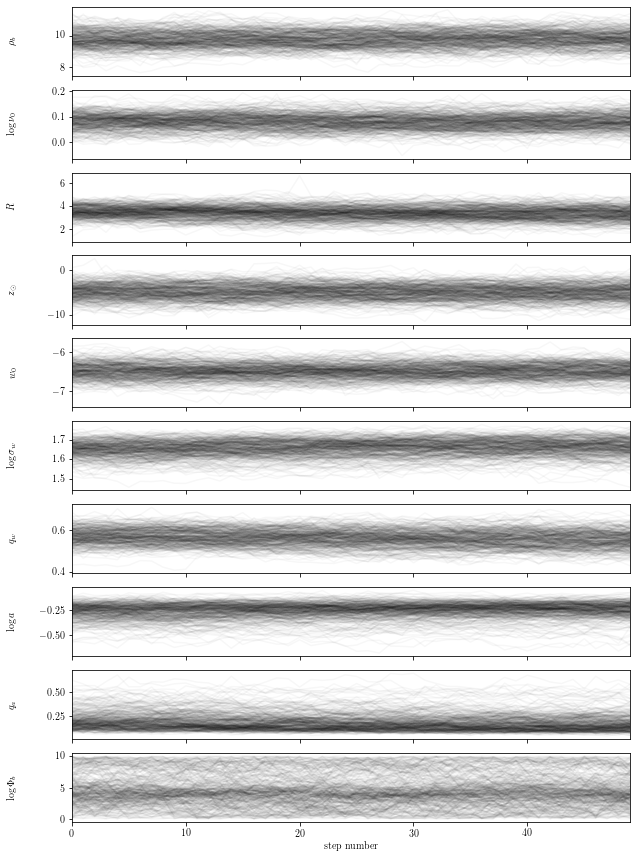

In [6]:
params = get_params(chain, indexes, labs)

plot_chain(
    params=params,
    labels=labels,
    alpha=0.03
)

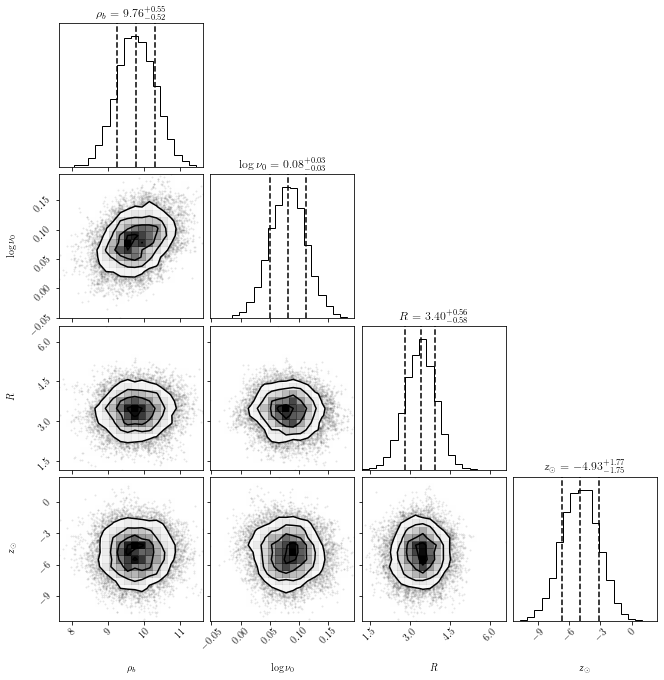

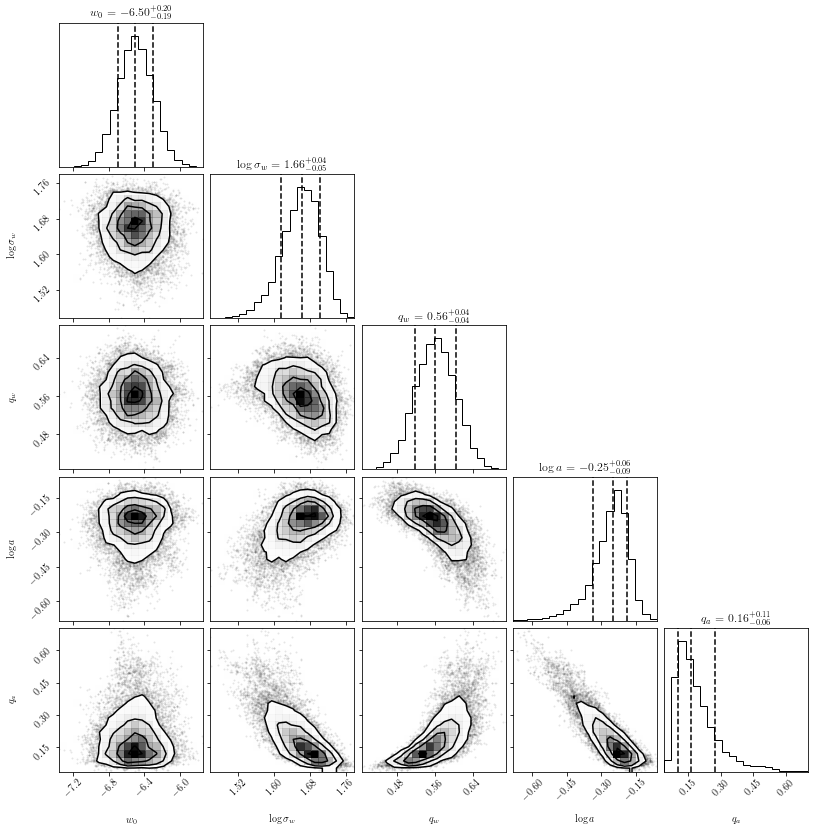

In [7]:
params = get_params(chain, indexes, labs)
bs =  {
    'DM': 5,
    'DDDM': 7,
    'NO': 4
}

b = bs[Model.NO.value]

# z
plot_corner(
    params=params[:,:,:b],
    labels=labels[:b],
)
# w
plot_corner(
    params=params[:,:,b:-1],
    labels=labels[b:-1],
)

  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 50000/50000 [00:25<00:00, 1947.41it/s]


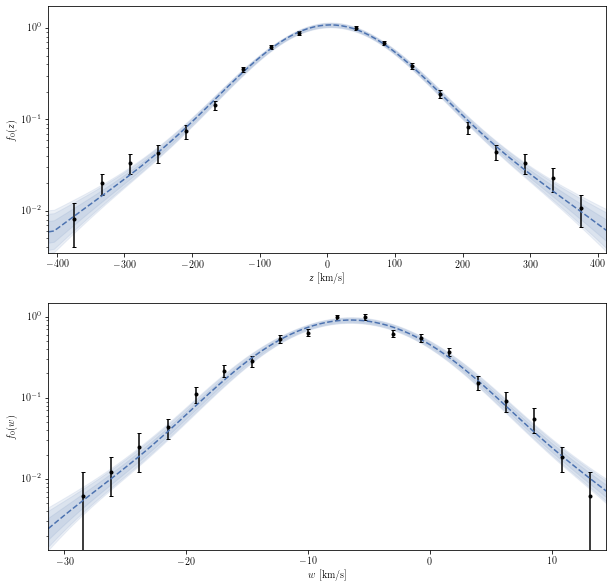

In [8]:
ndim = chain.shape[2]
flat_chain = chain.reshape((-1, ndim))

plot_fit(
    model=Model.NO,
    flat_chain=flat_chain,
    z_path=z_files[index],
    w_path=w_files[index],
    log=True,
    nsample=50_000,
    res=100
)

In [12]:
ndim = chain.shape[2]
flat_chain = chain.reshape((-1, ndim))
zdata = get_data(z_files[index])
wdata = get_data(w_files[index])

calculate_prob(
    model=Model.DM, 
    zdata=zdata,
    wdata=wdata,
    flat_chain=flat_chain,
    name=name,
    path="tes.txt",
    nsample=50_000,
)

running...
opening pred file...
opening phis file...
Calculating likelihood
max log-likelihood: 120.55625841073874
BIC: -37.93479667608085
AIC: -187.11251682147747


# Script

do mcmc for

* same $N$, different $z$
* same $z$, different $N$

Each 'running' contains
1. generate_init: initial position for walkers.
    * this is done by the experiment above.
2. run_mcmc: run true mcmc for 10_000 steps.
3. plot trace: plot trace plot for preliminary mcmc.
4. plot corner: plot corner plot for the long run.
5. plot fit: fitting plot for vertical density and vertical dispersion.
6. calculate bic & aic: calculate bic and aic for the long run.

All of these functionalities are implemented in `mcmc.py` at `utils`.

Just run the `program.py` at `script`.
To automate the process for all data, run `run_program.py` at `script`.

# Mock comparison

run mcmc but now for mock data comparison.

`Data/MCMC/dm_mock/mock/comp`

It contains mock data with different number of data points.
1000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000

This comparison is done to see the prediction power of the model.

The script for comparing also implemented in `script` folder.